In [10]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Configurar SSL para evitar problemas ao carregar o dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# URL do dataset Wine
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

# Nome das colunas em português
column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

# Ler os dados
vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})

# Separar variáveis independentes (X) e dependente (y)
X = vinhos.iloc[:, 1:]  # Todas as colunas menos 'classe'
y = vinhos['classe']    # Apenas a coluna 'classe'


In [11]:
def avaliar_knn_kfold(random_state, k_values):
    """
    Avalia o KNN com K-Fold Cross-Validation para diferentes valores de k.
    """
    # Configurar K-Fold
    kf = KFold(n_splits=10, shuffle=True, random_state=random_state)

    # Resultados para cada valor de k
    resultados = {k: [] for k in k_values}

    # Loop pelos folds
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        for k in k_values:
            # Treinar o modelo KNN
            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train, y_train)

            # Fazer previsões
            y_pred = knn.predict(X_test)

            # Calcular a acurácia
            accuracy = accuracy_score(y_test, y_pred)
            resultados[k].append(accuracy)

    # Calcular a média e o desvio padrão das acurácias
    medias = {k: np.mean(resultados[k]) for k in k_values}
    desvios = {k: np.std(resultados[k]) for k in k_values}

    # Exibir os resultados
    print(f"Random State: {random_state}")
    for k in k_values:
        print(f"k={k}: Média={medias[k]:.4f}, Desvio Padrão={desvios[k]:.4f}")
    print("-" * 40)

    return medias, desvios


In [12]:
# Valores de k a serem testados
k_values = [3, 5]

# Random States a serem testados
random_states = [42, 17, 24]

# Resultados globais
resultados_finais = {}

for random_state in random_states:
    medias, desvios = avaliar_knn_kfold(random_state, k_values)
    resultados_finais[random_state] = {"medias": medias, "desvios": desvios}


Random State: 42
k=3: Média=0.7036, Desvio Padrão=0.1392
k=5: Média=0.6641, Desvio Padrão=0.1001
----------------------------------------
Random State: 17
k=3: Média=0.6987, Desvio Padrão=0.1040
k=5: Média=0.6876, Desvio Padrão=0.1121
----------------------------------------
Random State: 24
k=3: Média=0.7127, Desvio Padrão=0.0968
k=5: Média=0.7127, Desvio Padrão=0.0940
----------------------------------------


In [13]:
# Análise comparativa dos resultados
print("Análise Comparativa:")
for random_state, resultado in resultados_finais.items():
    medias = resultado['medias']
    desvios = resultado['desvios']
    melhor_k = max(medias, key=medias.get)
    print(f"Random State: {random_state}")
    print(f"Melhor valor de k: {melhor_k} com média de {medias[melhor_k]:.4f} e desvio padrão de {desvios[melhor_k]:.4f}")
    print("-" * 40)


Análise Comparativa:
Random State: 42
Melhor valor de k: 3 com média de 0.7036 e desvio padrão de 0.1392
----------------------------------------
Random State: 17
Melhor valor de k: 3 com média de 0.6987 e desvio padrão de 0.1040
----------------------------------------
Random State: 24
Melhor valor de k: 3 com média de 0.7127 e desvio padrão de 0.0968
----------------------------------------


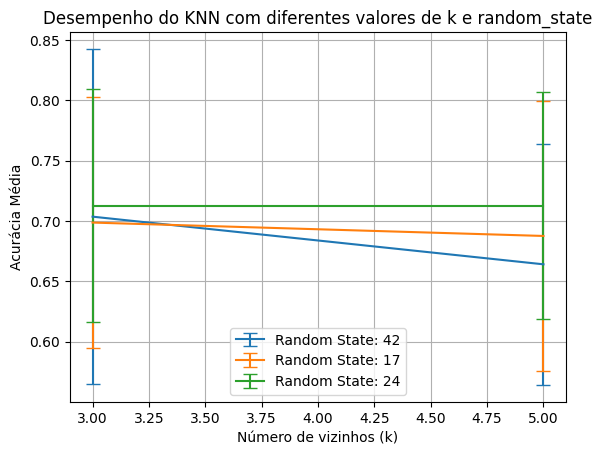

In [15]:
# Corrigir o loop de visualização
for random_state, resultado in resultados_finais.items():
    medias = resultado['medias']
    desvios = resultado['desvios']

    # Convertendo para listas para evitar erros
    k_list = list(medias.keys())
    mean_values = list(medias.values())
    std_values = list(desvios.values())

    # Plotar o gráfico
    plt.errorbar(k_list, mean_values, yerr=std_values, label=f"Random State: {random_state}", capsize=5)

plt.title("Desempenho do KNN com diferentes valores de k e random_state")
plt.xlabel("Número de vizinhos (k)")
plt.ylabel("Acurácia Média")
plt.legend()
plt.grid(True)
plt.show()
